In [1]:
import pandas as pd
import numpy as np

In [4]:
train = pd.read_csv("train.csv")

In [6]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [9]:
train.shape

(26729, 10)

In [14]:
train.isnull().sum()/len(train)*100

AnimalID           0.000000
Name              28.773991
DateTime           0.000000
OutcomeType        0.000000
OutcomeSubtype    50.925961
AnimalType         0.000000
SexuponOutcome     0.003741
AgeuponOutcome     0.067343
Breed              0.000000
Color              0.000000
dtype: float64

In [18]:
train.dtypes

AnimalID          object
Name              object
DateTime          object
OutcomeType       object
OutcomeSubtype    object
AnimalType        object
SexuponOutcome    object
AgeuponOutcome    object
Breed             object
Color             object
dtype: object

In [21]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [24]:
train.duplicated().sum()

0

In [34]:
len(train["DateTime"].value_counts())

22918

In [36]:
len(train["AnimalType"].value_counts())

2

In [194]:
train["SexuponOutcome"].value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

In [212]:
for i in list(train.columns):
    print(i,":",len(train[i].value_counts()))
    

AnimalID : 26729
Name : 6374
DateTime : 22918
OutcomeType : 5
OutcomeSubtype : 16
AnimalType : 2
SexuponOutcome : 5
AgeuponOutcome : 44
Breed : 1380
Color : 366
age_day : 43
d : 43


In [43]:
for i in list(train.columns):
    print("---------")
    print(i)
    print("---------")
    print(train[i].value_counts())
    print("\n")

---------
AnimalID
---------
A690670    1
A658071    1
A716499    1
A688335    1
A682173    1
A685788    1
A647859    1
A699752    1
A534780    1
A694589    1
A694228    1
A696956    1
A686530    1
A717226    1
A661042    1
A670064    1
A719125    1
A709199    1
A657441    1
A698272    1
A670070    1
A688372    1
A708964    1
A695774    1
A700559    1
A281542    1
A694468    1
A696799    1
A699621    1
A712400    1
          ..
A692033    1
A550885    1
A708959    1
A685593    1
A666871    1
A698196    1
A676685    1
A681958    1
A661068    1
A703163    1
A684770    1
A710004    1
A706326    1
A691868    1
A688062    1
A718708    1
A694348    1
A703156    1
A673043    1
A699169    1
A682022    1
A682505    1
A687156    1
A714046    1
A678743    1
A687713    1
A693908    1
A656694    1
A697951    1
A632870    1
Name: AnimalID, Length: 26729, dtype: int64


---------
Name
---------
Max             136
Bella           135
Charlie         107
Daisy           106
Lucy             94
Buddy  

## 6.	La variable objetivo es 'OutcomeType': qué valores tiene y en qué probabilidad? 

In [48]:
train["OutcomeType"].value_counts()/len(train["OutcomeType"])*100

Adoption           40.289573
Transfer           35.250103
Return_to_owner    17.905646
Euthanasia          5.817651
Died                0.737027
Name: OutcomeType, dtype: float64

In [207]:
t2=train.groupby(["AnimalType","OutcomeType"], as_index=False).agg({"AnimalID":"count"})
t2["prop"] = t2["AnimalID"]/len(train["OutcomeType"])*100
t2

,AnimalType,OutcomeType,AnimalID,prop
0,Cat,Adoption,4272,15.982641
1,Cat,Died,147,0.549964
2,Cat,Euthanasia,710,2.656291
3,Cat,Return_to_owner,500,1.870627
4,Cat,Transfer,5505,20.595608
5,Dog,Adoption,6497,24.306933
6,Dog,Died,50,0.187063
7,Dog,Euthanasia,845,3.161360
8,Dog,Return_to_owner,4286,16.035018
9,Dog,Transfer,3917,14.654495


In [52]:
cats = train.loc[train.AnimalType == 'Cat']
dogs = train.loc[train.AnimalType == 'Dog']

In [53]:
cats.OutcomeType.value_counts()/len(cats.OutcomeType)*100

Transfer           49.443147
Adoption           38.368960
Euthanasia          6.376864
Return_to_owner     4.490749
Died                1.320280
Name: OutcomeType, dtype: float64

In [54]:
dogs.OutcomeType.value_counts()/len(dogs.OutcomeType)*100


Adoption           41.660789
Return_to_owner    27.483168
Transfer           25.117025
Euthanasia          5.418403
Died                0.320616
Name: OutcomeType, dtype: float64

In [57]:
train["AnimalType"].value_counts()

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

In [59]:
from statsmodels.stats.proportion import proportions_ztest

In [62]:
# Defining a hypothesis checker function:
def hyp_checker(pvalue):
   alpha = 0.05
   if type(alpha) != float:
       print('Insert a correct alpha')
       return hyp_checker(result)
   else:
       if pvalue <= alpha:
           return "Our p value ({}) is smaller than our alpha({}). H0 is rejected".format(pvalue, alpha)
       else:
           return "Our p value ({}) is bigger than our alpha({}). Fail to reject H0".format(pvalue, alpha)

In [64]:
from scipy.stats import chi2_contingency


for i in list(train.OutcomeType.value_counts().index):
   conting = pd.crosstab(train.AnimalType, train.OutcomeType == i)
   result = chi2_contingency(conting)
   print('{}:'.format(i))
   print(result[1])
   print(hyp_checker(result[1]))
   print('\n')

Adoption:
6.788792953855693e-08
Our p value (6.788792953855693e-08) is smaller than our alpha(0.05). H0 is rejected


Transfer:
0.0
Our p value (0.0) is smaller than our alpha(0.05). H0 is rejected


Return_to_owner:
0.0
Our p value (0.0) is smaller than our alpha(0.05). H0 is rejected


Euthanasia:
0.0010614377915052896
Our p value (0.0010614377915052896) is smaller than our alpha(0.05). H0 is rejected


Died:
8.986039355204564e-21
Our p value (8.986039355204564e-21) is smaller than our alpha(0.05). H0 is rejected




In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
teste2 = train["OutcomeSubtype"].value_counts()/len(train["OutcomeSubtype"])*100
teste2.head()

Partner       29.241648
Foster         6.734259
SCRP           5.982266
Suffering      3.748737
Aggressive     1.197202
Name: OutcomeSubtype, dtype: float64

In [72]:
train["AgeuponOutcome"].value_counts()/len(train["AgeuponOutcome"])*100

1 year       14.849040
2 years      13.999776
2 months     12.709043
3 years       6.820308
1 month       4.792547
3 months      4.777582
4 years       4.006884
5 years       3.711325
4 months      3.322234
6 years       2.506641
3 weeks       2.465487
5 months      2.439298
6 months      2.199858
8 years       2.005313
7 years       1.986606
2 weeks       1.979124
10 months     1.709753
10 years      1.668600
8 months      1.503984
4 weeks       1.249579
9 years       1.077481
7 months      1.077481
12 years      0.875454
9 months      0.838041
1 weeks       0.639755
11 months     0.621048
1 week        0.546223
13 years      0.534999
11 years      0.471398
3 days        0.407797
2 days        0.370384
14 years      0.362902
15 years      0.318007
1 day         0.246923
4 days        0.187063
6 days        0.187063
16 years      0.134685
5 days        0.089790
0 years       0.082308
17 years      0.063601
5 weeks       0.041154
18 years      0.037413
19 years      0.011224
20 years   

In [121]:
def to_day(string):
    if "year" in string:
        string = string.replace('s', '')
        string = int(string.replace("year","").strip())
        string *= 365 
        return string
        
    elif "month" in string:
        string = string.replace('s', '')
        string = int(string.replace("month","").strip())
        string *= 30 
        return string
        
    elif "week" in string:
        string = string.replace('s', '')
        string = int(string.replace("week","").strip())
        string *= 7 
        return string
    else:
        string = string.replace('s', '')
        string = int(string.replace("day","").strip())
        return string


In [142]:
train['age_day'] = train.AgeuponOutcome.dropna().apply(lambda x: to_day(x))


In [151]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,age_day,d
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365.0,365.0
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365.0,365.0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730.0,730.0
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,21.0,21.0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,730.0,730.0


In [183]:
teste = train.groupby(["OutcomeType","SexuponOutcome"], as_index=False).agg({"AnimalID":"count"})
teste["prop"] = teste["AnimalID"]/len(train["SexuponOutcome"])*100
teste.head()

,OutcomeType,SexuponOutcome,AnimalID,prop
0,Adoption,Intact Female,203,0.759475
1,Adoption,Intact Male,158,0.591118
2,Adoption,Neutered Male,5222,19.536833
3,Adoption,Spayed Female,5186,19.402147
4,Died,Intact Female,56,0.209510


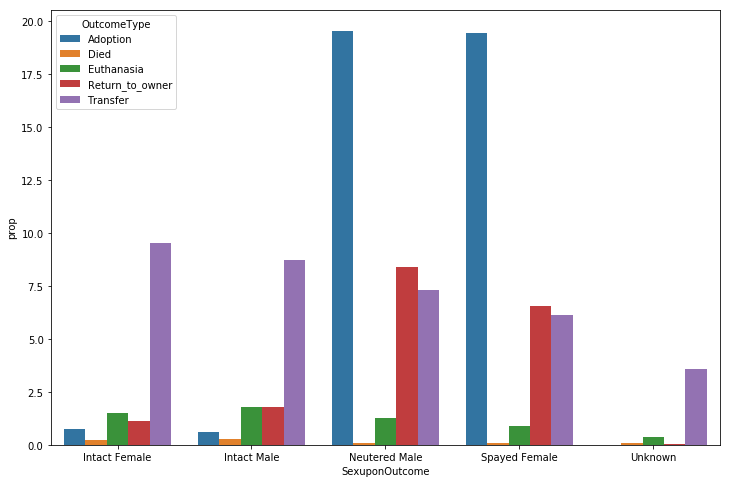

In [187]:
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x="SexuponOutcome",y="prop",data=teste, hue="OutcomeType")

In [176]:
teste.plot.bar(x="OutcomeType",y=["AnimalID"/len['AnimalID']*100)

SyntaxError: invalid syntax (<ipython-input-176-6657131d2176>, line 1)

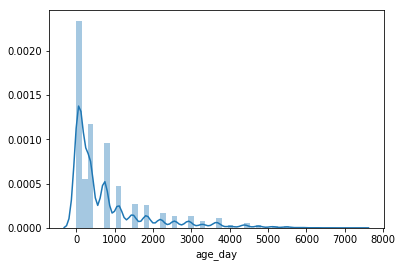

In [173]:
sns.distplot(train["age_day"].dropna())

In [188]:
train["SexuponOutcome"].value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

In [193]:
train["DateTime"] = pd.to_datetime(train["DateTime"])


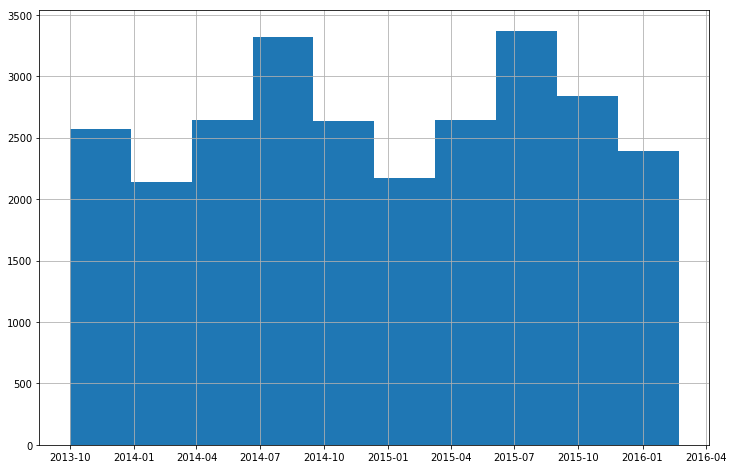

In [197]:
fig,ax = plt.subplots(figsize=(12,8))
train["DateTime"].hist()